# 데이터 살피기

In [0]:
import pandas as pd
import numpy as np
import re
pd.set_option('display.max_columns', 25)

df = pd.read_json(os.path.join("..","..","data","TA_User_Reviws_Korea_all.json"))
df.head()

,id,language,reviewStatus,title,helpfulVotes,createdDate,publishedDate,rating,text,photoIds,photos,userId,...,userProfile.hometown.location.__typename,tripInfo,location.thumbnail,route,location.route,userProfile.route,location.reviewSummary,location.parent,userProfile.hometown.location.parent,userProfile.contributionCounts,location,userProfile.avatar
0,748454819,en,PUBLISHED,Great Hotel,0,2020-03-01,2020-03-01,5,I really enjoyed our stay here in Gracery Hote...,[453807126],"[{'id': 453807126, 'title': None, 'description...",F9AD0C1F6409A1574AD0AFC237D2A4CE,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,744980685,en,PUBLISHED,Vibrant and Trendy,0,2020-02-14,2020-02-13,5,This is a place for you to laidback and have s...,[],[],23EF5413495FF530151DB7E5C0FEF38D,...,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,744978150,en,PUBLISHED,So Yummy!,0,2020-02-14,2020-02-13,4,The chicken was so delicious. its crisp and cr...,[],[],23EF5413495FF530151DB7E5C0FEF38D,...,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,744977340,en,PUBLISHED,Super Luv,0,2020-02-14,2020-02-13,5,"First, the location. Its located just right be...",[],[],23EF5413495FF530151DB7E5C0FEF38D,...,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,744973034,en,PUBLISHED,Chaotic Street Food,0,2020-02-14,2020-02-13,4,This is the place where you can shop any cosme...,[],[],23EF5413495FF530151DB7E5C0FEF38D,...,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.columns

Index(['id', 'language', 'reviewStatus', 'title', 'helpfulVotes',
       'createdDate', 'publishedDate', 'rating', 'text', 'photoIds', 'photos',
       'userId', '__typename', 'location.locationId', 'location.name',
       'location.additionalNames.long',
       'location.additionalNames.longOnlyParent',
       'location.additionalNames.__typename', 'location.placeType',
       'location.isGeo', 'location.parentGeoId',
       'location.reviewSummary.count', 'location.reviewSummary.rating',
       'location.reviewSummary.locationId',
       'location.reviewSummary.__typename', 'location.thumbnail.id',
       'location.thumbnail.photoSizes', 'location.thumbnail.__typename',
       'location.parent.locationId', 'location.parent.parentGeoId',
       'location.parent.name', 'location.parent.additionalNames.long',
       'location.parent.additionalNames.__typename',
       'location.parent.__typename', 'location.route.url',
       'location.route.__typename', 'location.socialStatistics.isSav

In [0]:
df.iloc[:5,:25]

,id,language,reviewStatus,title,helpfulVotes,createdDate,publishedDate,rating,text,photoIds,photos,userId,__typename,location.locationId,location.name,location.additionalNames.long,location.additionalNames.longOnlyParent,location.additionalNames.__typename,location.placeType,location.isGeo,location.parentGeoId,location.reviewSummary.count,location.reviewSummary.rating,location.reviewSummary.locationId,location.reviewSummary.__typename
0,748454819,en,PUBLISHED,Great Hotel,0,2020-03-01,2020-03-01,5,I really enjoyed our stay here in Gracery Hote...,[453807126],"[{'id': 453807126, 'title': None, 'description...",F9AD0C1F6409A1574AD0AFC237D2A4CE,Review,14159911,Hotel Gracery Seoul,"Hotel Gracery Seoul, South Korea",South Korea,AdditionalNames,ACCOMMODATION,False,294197,86.0,4.0,14159911.0,LocationReviewSummary
1,744980685,en,PUBLISHED,Vibrant and Trendy,0,2020-02-14,2020-02-13,5,This is a place for you to laidback and have s...,[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,1958940,Hongik University Street,"Hongik University Street, South Korea",South Korea,AdditionalNames,ATTRACTION,False,294197,2256.0,4.5,1958940.0,LocationReviewSummary
2,744978150,en,PUBLISHED,So Yummy!,0,2020-02-14,2020-02-13,4,The chicken was so delicious. its crisp and cr...,[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,5979642,Noonaholdak Hongdae,"Noonaholdak Hongdae, South Korea",South Korea,AdditionalNames,EATERY,False,294197,25.0,4.5,5979642.0,LocationReviewSummary
3,744977340,en,PUBLISHED,Super Luv,0,2020-02-14,2020-02-13,5,"First, the location. Its located just right be...",[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,13426084,L7 Hongdae,"L7 Hongdae, South Korea",South Korea,AdditionalNames,ACCOMMODATION,False,294197,232.0,4.5,13426084.0,LocationReviewSummary
4,744973034,en,PUBLISHED,Chaotic Street Food,0,2020-02-14,2020-02-13,4,This is the place where you can shop any cosme...,[],[],23EF5413495FF530151DB7E5C0FEF38D,Review,553546,Myeongdong Shopping Street,"Myeongdong Shopping Street, South Korea",South Korea,AdditionalNames,ATTRACTION,False,294197,10353.0,4.5,553546.0,LocationReviewSummary


In [0]:
df.iloc[:5,25:50]

,location.thumbnail.id,location.thumbnail.photoSizes,location.thumbnail.__typename,location.parent.locationId,location.parent.parentGeoId,location.parent.name,location.parent.additionalNames.long,location.parent.additionalNames.__typename,location.parent.__typename,location.route.url,location.route.__typename,location.socialStatistics.isSaved,location.socialStatistics.__typename,location.__typename,userProfile.userId,userProfile.isMe,userProfile.isVerified,userProfile.displayName,userProfile.username,userProfile.contributionCounts.sumAllUgc,userProfile.contributionCounts.__typename,userProfile.avatar.id,userProfile.avatar.photoSizes,userProfile.avatar.__typename,userProfile.hometown.locationId
0,361115988.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Hotel_Review-g294197-d14159911-Reviews-Hotel_...,LocationDetailRoute,False,SocialStatistics,LocationInformation,F9AD0C1F6409A1574AD0AFC237D2A4CE,False,False,nataliea328,nataliea328,7,ContributionCounts,452388042.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,NaN
1,38633900.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Attraction_Review-g294197-d1958940-Reviews-Ho...,LocationDetailRoute,False,SocialStatistics,LocationInformation,23EF5413495FF530151DB7E5C0FEF38D,False,False,Deta,detakulitjeruk,225,ContributionCounts,260083810.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294229.0
2,160976645.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Restaurant_Review-g294197-d5979642-Reviews-No...,LocationDetailRoute,False,SocialStatistics,LocationInformation,23EF5413495FF530151DB7E5C0FEF38D,False,False,Deta,detakulitjeruk,225,ContributionCounts,260083810.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294229.0
3,303949955.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Hotel_Review-g294197-d13426084-Reviews-L7_Hon...,LocationDetailRoute,False,SocialStatistics,LocationInformation,23EF5413495FF530151DB7E5C0FEF38D,False,False,Deta,detakulitjeruk,225,ContributionCounts,260083810.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294229.0
4,29532896.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294197,294196,Seoul,"Seoul, South Korea",AdditionalNames,LocationInformation,/Attraction_Review-g294197-d553546-Reviews-Mye...,LocationDetailRoute,False,SocialStatistics,LocationInformation,23EF5413495FF530151DB7E5C0FEF38D,False,False,Deta,detakulitjeruk,225,ContributionCounts,260083810.0,[{'url': 'https://dynamic-media-cdn.tripadviso...,Photo,294229.0


In [0]:
df.iloc[:5,50:75]

,userProfile.hometown.fallbackString,userProfile.hometown.location,userProfile.hometown.__typename,userProfile.expertForums.generalForumIds,userProfile.expertForums.geoForumLocationIds,userProfile.expertForums.__typename,userProfile.route.url,userProfile.route.__typename,userProfile.__typename,userProfile.isFollowing,userProfile.followerCount,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isBoosted,socialStatistics.boostCount,socialStatistics.likeCount,socialStatistics.isReposted,socialStatistics.repostCount,socialStatistics.isSaved,socialStatistics.tripCount,socialStatistics.__typename,route.url,route.__typename,tripInfo.stayDate
0,None,NaN,MemberLocation,[],[],ExpertForums,/Profile/nataliea328,MemberProfileRoute,MemberProfile,0.0,0.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d14159911-r748454819-...,ShowUserReviewRoute,2020-02-29
1,294229,NaN,MemberLocation,[],[],ExpertForums,/Profile/detakulitjeruk,MemberProfileRoute,MemberProfile,0.0,1.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d1958940-r744980685-H...,ShowUserReviewRoute,2020-01-31
2,294229,NaN,MemberLocation,[],[],ExpertForums,/Profile/detakulitjeruk,MemberProfileRoute,MemberProfile,0.0,1.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d5979642-r744978150-N...,ShowUserReviewRoute,2020-01-31
3,294229,NaN,MemberLocation,[],[],ExpertForums,/Profile/detakulitjeruk,MemberProfileRoute,MemberProfile,0.0,1.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d13426084-r744977340-...,ShowUserReviewRoute,2020-01-31
4,294229,NaN,MemberLocation,[],[],ExpertForums,/Profile/detakulitjeruk,MemberProfileRoute,MemberProfile,0.0,1.0,0,False,False,False,0,0,False,0,False,0,SocialStatistics,/ShowUserReviews-g294197-d553546-r744973034-My...,ShowUserReviewRoute,2019-12-31


In [0]:
df.iloc[:5,75:100]

,tripInfo.__typename,userProfile.hometown.location.locationId,userProfile.hometown.location.name,userProfile.hometown.location.additionalNames.long,userProfile.hometown.location.additionalNames.__typename,userProfile.hometown.location.parent.locationId,userProfile.hometown.location.parent.name,userProfile.hometown.location.parent.__typename,userProfile.hometown.location.__typename,tripInfo,location.thumbnail,route,location.route,userProfile.route,location.reviewSummary,location.parent,userProfile.hometown.location.parent,userProfile.contributionCounts,location,userProfile.avatar
0,TripInfo,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TripInfo,294229.0,Jakarta,"Jakarta, Indonesia",AdditionalNames,294228.0,Java,LocationInformation,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TripInfo,294229.0,Jakarta,"Jakarta, Indonesia",AdditionalNames,294228.0,Java,LocationInformation,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TripInfo,294229.0,Jakarta,"Jakarta, Indonesia",AdditionalNames,294228.0,Java,LocationInformation,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TripInfo,294229.0,Jakarta,"Jakarta, Indonesia",AdditionalNames,294228.0,Java,LocationInformation,LocationInformation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df['userProfile.hometown.location.name'].unique()

array([None, 'Jakarta', 'Bangkok', ..., 'Langkawi', 'Nagasaki', 'Hoboken'],
      dtype=object)

In [0]:
user_review_count = df.groupby('userId')['rating'].agg([('user별 리뷰수','count')]).reset_index().sort_values('user별 리뷰수', ascending=False)
user_review_count

,userId,user별 리뷰수
6882,E5F93B0B3B8683B98A7B3642B2BE2399,1627
5871,C336D83530ADBB29B9171F14C58354F0,588
989,214B0FB3019C173168F2EBBF0077D671,533
1833,3C5338715DDDD2A65EF9C9EA389B0B9D,533
2377,4DE3B013E97FF932A47EAA8814D7F95A,388
...,...,...
2014,42313381E30D9D161FC454B3537BA6E9,1
2013,422AB60B2C35BC97EF06A1920F31938C,1
2012,422A86CCC83CCDEC0C919855D6CE04FD,1
4687,9D2C74C41B31B22772341EAF93EB5C91,1


In [0]:
user_review_count.describe()

,user별 리뷰수
count,7613.000000
mean,4.885985
std,25.811539
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,1627.000000


# Data Feature  
- title : 장소 대 분류 ?
- userId : 사용자 정보
- location.locationId : 호텔 정보
- location.placeType : 장소 형태 
- location.reviewSummary.count : 장소별 평균 리뷰수
- location.reviewSummary.rating : 장소별 평균 평점
- rating : 평점   
   
-> categorical :  title, userId, location.locationId, location.placeTyp, rating  

-> continuous : location.reviewSummary.count ,location.reviewSummary.rating 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals import joblib 
import pickle

import tensorflow as tf
from keras.layers import *
from keras.regularizers import *
from keras.optimizers import *
from keras.models import *
from keras.preprocessing.text import *
from keras.callbacks import EarlyStopping
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image

import random
random.seed(42)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [3]:
new_df = pd.read_csv('/content/gdrive/My Drive/tobigs_recommend/Phase 1. Data Collection & Preprocessing/1. Data/Hotel_Data/TA_User_Reviws_Korea_all_new_df.csv')

new_df.rename(columns={'location.locationId':'locationId', 'location.placeType':'placeType', 'location.reviewSummary.count':'reviewSummary_count','location.reviewSummary.rating':'reviewSummary_rating', 'location.reviewSummary.locationId':'reviewSummary_locationId', 'userProfile.hometown.location.name':'hometown_name'}, inplace=True)
# new_df.columns
new_df.head()

,userID,rating,locationId,placeType,reviewSummary_count,reviewSummary_rating,reviewSummary_locationId,hometown_name,stayDate
0,0,4,306130,ACCOMMODATION,4033.0,4.5,306130.0,Jakarta,2016-02-29
1,0,2,6352819,ATTRACTION,276.0,4.5,6352819.0,Jakarta,2016-02-29
2,1,5,9033360,EATERY,10.0,4.5,9033360.0,Seoul,2015-08-31
3,1,5,9017499,EATERY,8.0,4.0,9017499.0,Seoul,2015-11-30
4,1,5,4076062,EATERY,7.0,4.0,4076062.0,Seoul,2015-06-30


In [4]:
# from sklearn.model_selection import train_test_split

# train, test = train_test_split(new_df, test_size=0.33, random_state=42)
# print(train.shape, test.shape)

(19135, 9) (9426, 9)


In [0]:
def get_data(column) :
    
    vocab = {}
    num = 0

    for i in new_df[column]: # np.hstack([train[column], test[column]]): 
        if vocab.get(i) != None:
            continue

        vocab[i] = num
        num += 1

    encoded = [vocab[i] for i in new_df[column]]
    # encoded_d = [vocab[i] for i in test[column]]
    
    return encoded, num, vocab

In [0]:
encoded_userID, num_userID, vocab_userID = get_data('userID')

encoded_locationId, num_locationId, vocab_locationId = get_data('locationId')
encoded_placeType,  num_placeType, vocab_placeType = get_data('placeType')

encoded_reviewSummary_count,  num_reviewSummary_count, vocab_reviewSummary_count = get_data('reviewSummary_count')
encoded_reviewSummary_rating,  num_reviewSummary_rating, vocab_reviewSummary_rating = get_data('reviewSummary_rating')
encoded_reviewSummary_locationId,  num_reviewSummary_locationId, vocab_reviewSummary_locationId = get_data('reviewSummary_locationId')

encoded_hometown_name,  num_hometown_name, vocab_hometown_name = get_data('hometown_name')

encoded_stayDate,  num_stayDate, vocab_stayDate = get_data('stayDate')

In [0]:
def trans_mul(vects):
    z = tf.reshape(vects,(-1,n_factors,1))
    return z 

def concat_shape2D(vects):
    a1,a2,a3,a4,a5,a6,a7,a8 = vects 
    z = tf.concat([a1,a2],axis=2)
    z = tf.concat([z,a3],axis=2)
    z = tf.concat([z,a4],axis=2)
    z = tf.concat([z,a5],axis=2)
    z = tf.concat([z,a6],axis=2)
    z = tf.concat([z,a7],axis=2)
    z = tf.concat([z,a8],axis=2)
    return z

def sum_layer(vects):
    a1,a2,a3,a4,a5,a6,a7,a8 = vects
    z = tf.add(a1,a2)
    z = tf.add(z,a3) 
    z = tf.add(z,a4)
    z = tf.add(z,a5)
    z = tf.add(z,a6)
    z = tf.add(z,a7)
    z = tf.add(z,a8)
    return z 

# Input Data

In [0]:
n_factors = 8
layers = [16,8, 4]

# Input variables
userID = Input(shape=(1,), dtype='int64', name = 'userID')

locationId = Input(shape=(1,), dtype='int64', name = 'locationId')
placeType = Input(shape=(1,), dtype='int64', name = 'placeType')

reviewSummary_count = Input(shape=(1,), dtype='int64', name = 'reviewSummary_count')
reviewSummary_rating = Input(shape=(1,), dtype='int64', name = 'reviewSummary_rating')
reviewSummary_locationId = Input(shape=(1,), dtype='int64', name = 'reviewSummary_locationId')

hometown_name = Input(shape=(1,), dtype='int64', name = 'hometown_name')

stayDate = Input(shape=(1,), dtype='int64', name = 'stayDate')

In [0]:
FM_userID = Embedding(input_dim = num_userID, output_dim = n_factors, 
                              name = 'FM_userID', input_length=1)(userID)

FM_locationId = Embedding(input_dim = num_locationId, output_dim = n_factors,
                              name = 'FM_locationId', input_length=1)(locationId)  
FM_placeType = Embedding(input_dim = num_placeType, output_dim = n_factors, 
                              name = 'FM_placeType', input_length=1)(placeType)

FM_reviewSummary_count = Embedding(input_dim = num_reviewSummary_count, output_dim = n_factors, 
                              name = 'FM_reviewSummary_count', input_length=1)(reviewSummary_count)
FM_reviewSummary_rating= Embedding(input_dim = num_reviewSummary_rating, output_dim = n_factors,
                              name = 'FM_reviewSummary_rating', input_length=1)(reviewSummary_rating)   
FM_reviewSummary_locationId = Embedding(input_dim = num_reviewSummary_locationId, output_dim = n_factors,
                              name = 'FM_reviewSummary_locationId', input_length=1)(reviewSummary_locationId)  

FM_hometown_name = Embedding(input_dim = num_hometown_name, output_dim = n_factors, 
                              name = 'FM_hometown_name', input_length=1)(hometown_name)

FM_stayDate = Embedding(input_dim = num_stayDate, output_dim = n_factors, 
                              name = 'FM_stayDate', input_length=1)(stayDate)

In [0]:
FM_userID_latent = Flatten()(FM_userID)
FM_userID_latent = Lambda(trans_mul)(FM_userID_latent)

FM_locationId_latent = Flatten()(FM_locationId)
FM_locationId_latent = Lambda(trans_mul)(FM_locationId_latent)

FM_placeType_latent = Flatten()(FM_placeType)
FM_placeType_latent = Lambda(trans_mul)(FM_placeType_latent)

FM_reviewSummary_count_latent = Flatten()(FM_reviewSummary_count)
FM_reviewSummary_count_latent = Lambda(trans_mul)(FM_reviewSummary_count_latent)

FM_reviewSummary_rating_latent = Flatten()(FM_reviewSummary_rating)
FM_reviewSummary_rating_latent = Lambda(trans_mul)(FM_reviewSummary_rating_latent)

FM_reviewSummary_locationId_latent = Flatten()(FM_reviewSummary_locationId)
FM_reviewSummary_locationId_latent = Lambda(trans_mul)(FM_reviewSummary_locationId_latent)

FM_hometown_name_latent = Flatten()(FM_hometown_name)
FM_hometown_name_latent = Lambda(trans_mul)(FM_hometown_name_latent)

FM_stayDate_latent = Flatten()(FM_stayDate)
FM_stayDate_latent = Lambda(trans_mul)(FM_stayDate_latent)

FM_conv1d =Lambda(concat_shape2D)([FM_userID_latent, FM_locationId_latent, FM_placeType_latent, 
                             FM_reviewSummary_count_latent, FM_reviewSummary_rating_latent,FM_reviewSummary_locationId_latent,
                             FM_hometown_name_latent,FM_stayDate_latent])


MF_part = Conv1D(128,kernel_size=1,activation='relu')(FM_conv1d)
MF_part = Flatten()(MF_part)

In [0]:
mlp_concat = Concatenate()([FM_userID_latent, FM_locationId_latent, FM_placeType_latent, 
                             FM_reviewSummary_count_latent, FM_reviewSummary_rating_latent,FM_reviewSummary_locationId_latent,
                             FM_hometown_name_latent,FM_stayDate_latent])
mlp_concat = Flatten()(mlp_concat)

mlp_concat1 = Dense(layers[0], activation='elu', name=f"layer{0}")(mlp_concat) 
mlp_concat1 = Dense(layers[1], activation='elu', name=f"layer{1}")(mlp_concat1)
mlp_concat = Concatenate()([mlp_concat,mlp_concat1])
mlp_concat = Dense(layers[2],activation='elu')(mlp_concat)

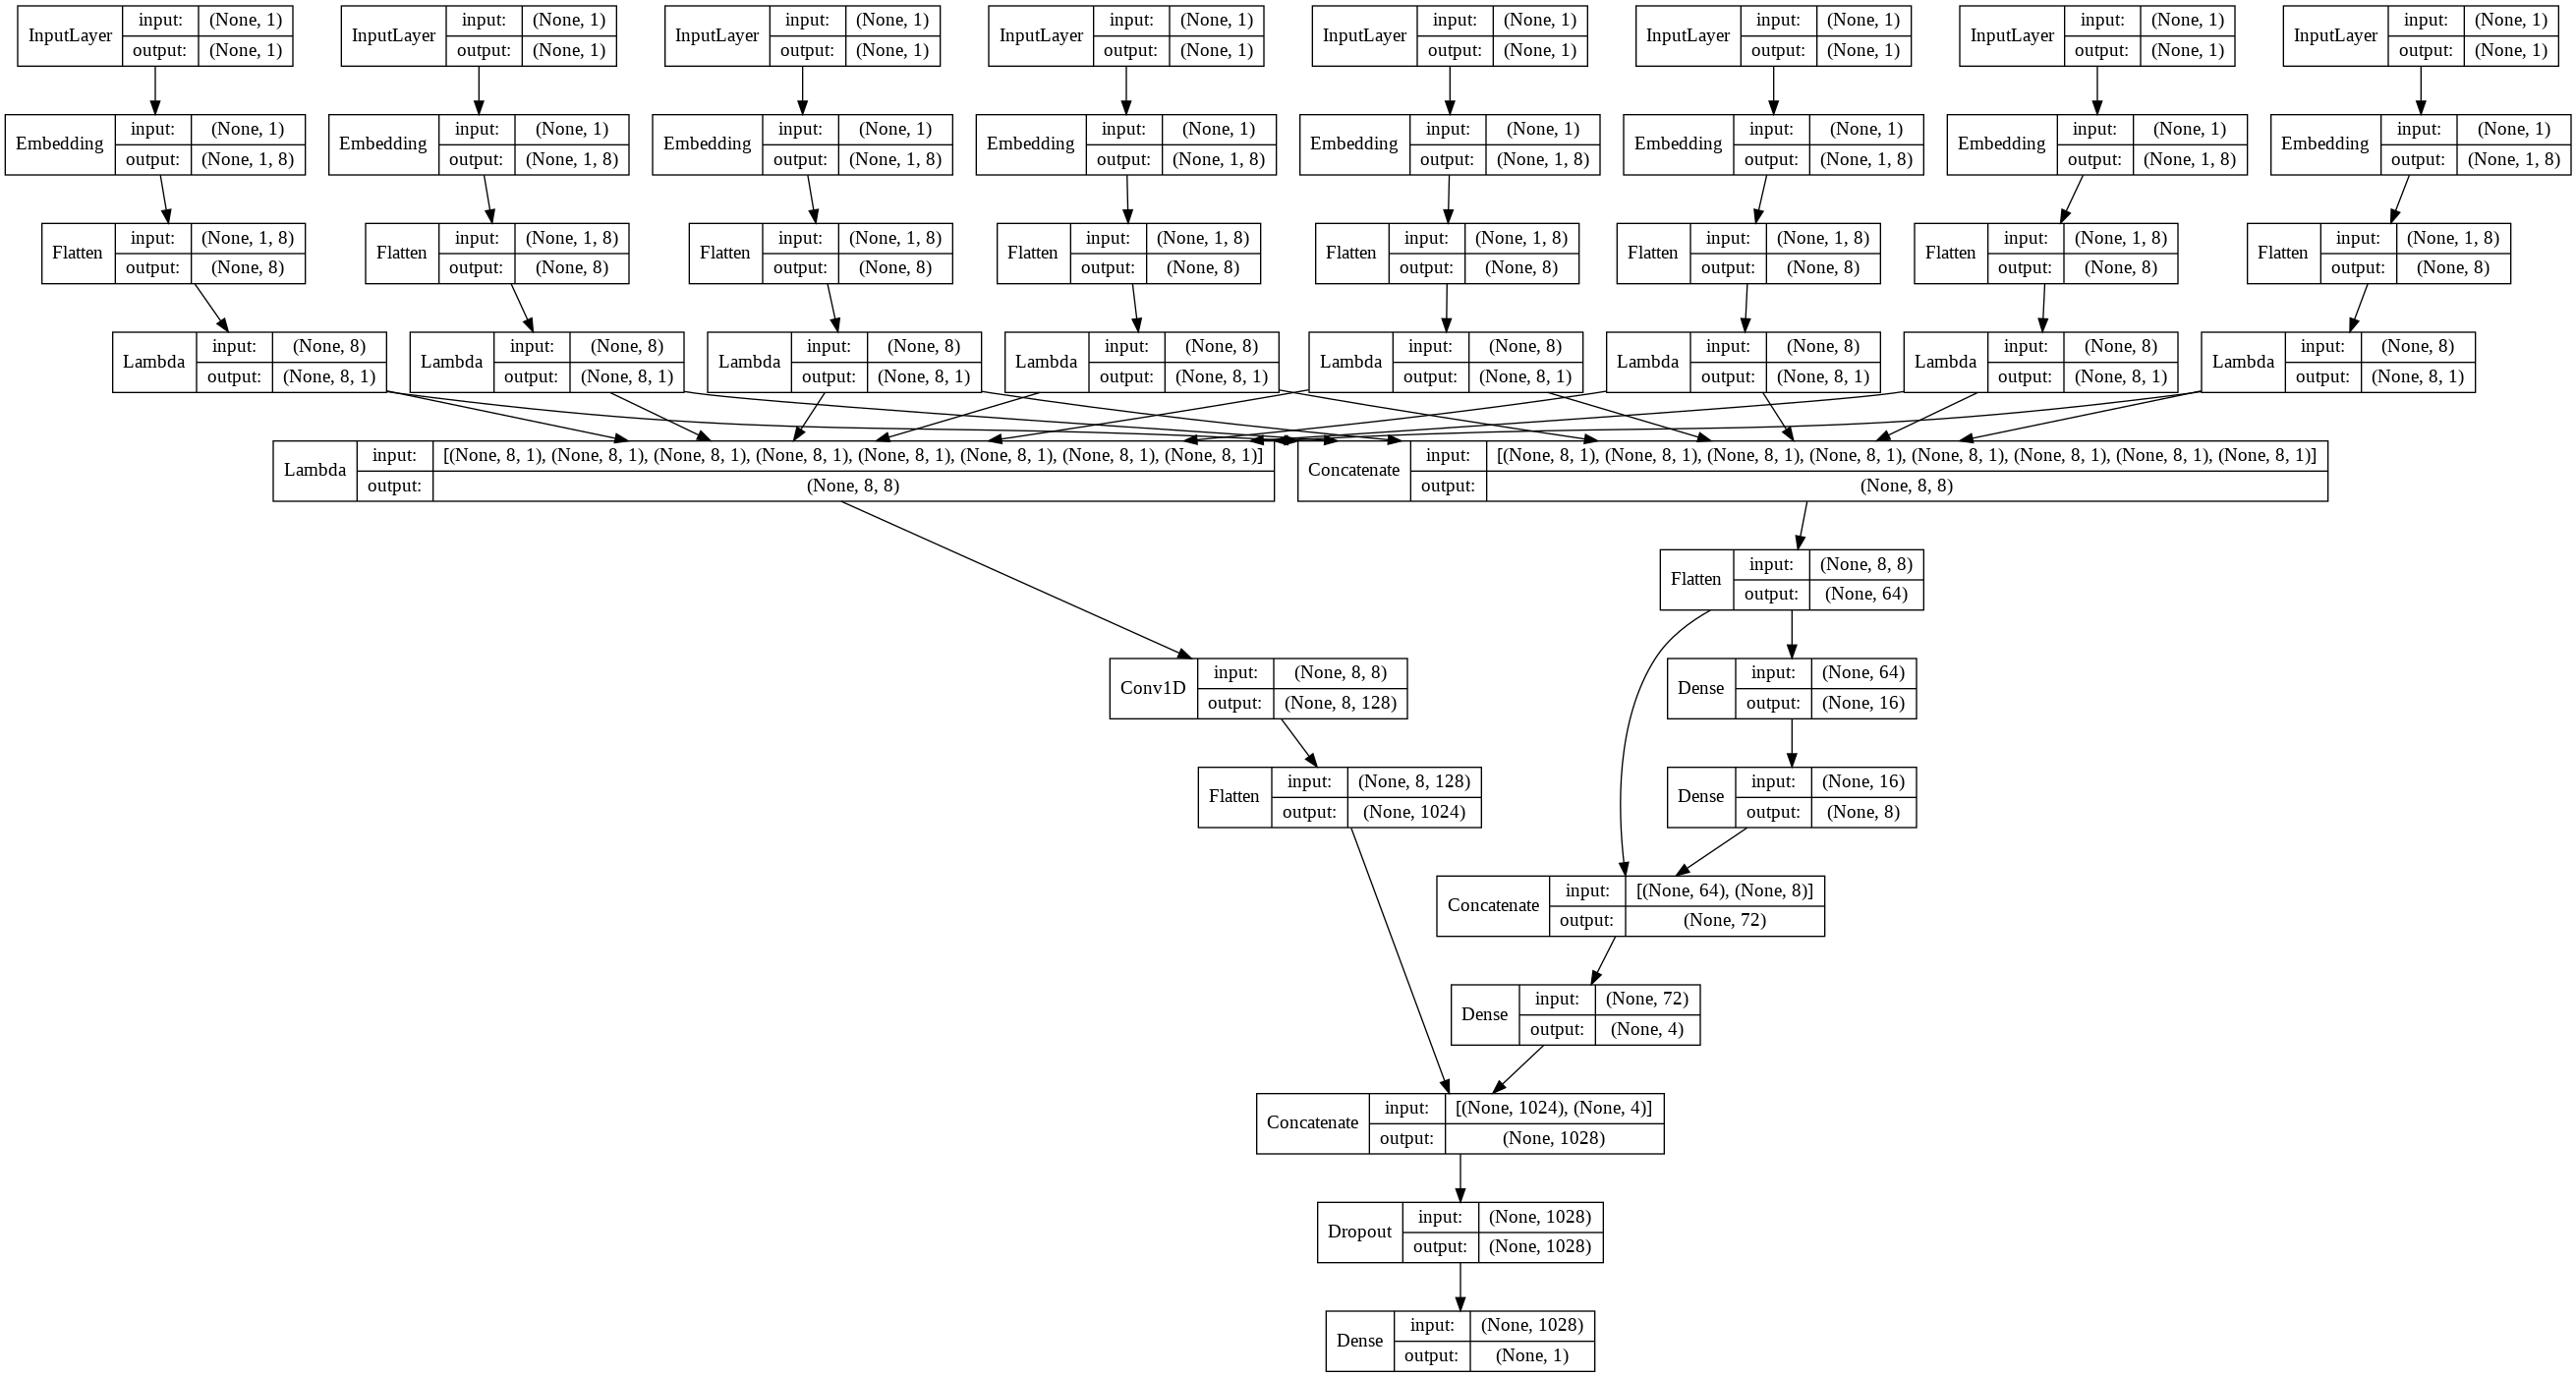

In [29]:
# Concatenate MF and MLP parts
predict_vector = Concatenate()([MF_part, mlp_concat])
predict_vector = Dropout(0.2)(predict_vector)

# Final prediction layer
prediction = Dense(1, name = "prediction")(predict_vector) # activation='sigmoid',
model = Model([userID, locationId, placeType, reviewSummary_count, reviewSummary_rating,
              reviewSummary_locationId, hometown_name, stayDate], prediction)
model.compile(loss="mse", optimizer=RMSprop(lr=1e-3), metrics=[tf.keras.metrics.AUC()])

Image(model_to_dot(model,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 28418 samples, validate on 143 samples
Epoch 1/20
28418/28418 [==============================] - 1s 20us/step - loss: 15.1902 - auc_1: 0.0000e+00 - val_loss: 12.7463 - val_auc_1: 0.0000e+00
Epoch 2/20
28418/28418 [==============================] - 0s 8us/step - loss: 7.8803 - auc_1: 0.0000e+00 - val_loss: 5.3517 - val_auc_1: 0.0000e+00
Epoch 3/20
28418/28418 [==============================] - 0s 9us/step - loss: 2.3624 - auc_1: 0.0000e+00 - val_loss: 1.5673 - val_auc_1: 0.0000e+00
Epoch 4/20
28418/28418 [==============================] - 0s 8us/step - loss: 0.8295 - auc_1: 0.0000e+00 - val_loss: 1.0430 - val_auc_1: 0.0000e+00
Epoch 5/20
28418/28418 [==============================] - 0s 8us/step - loss: 0.7152 - auc_1: 0.0000e+00 - val_loss: 1.0153 - val_auc_1: 0.0000e+00
Epoch 6/20
28418/28418 [==============================] - 0s 8us/step - loss: 0.6515 - auc_1: 0.0000e+00 - val_loss: 1.0132 - val_auc_1: 0.0000e+00
Epoch 7/20
28418/28418 [==============================] - 0s 

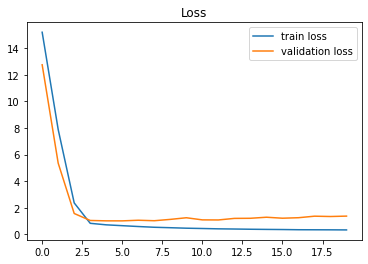

In [31]:
history = model.fit(x=[encoded_userID, encoded_locationId, encoded_placeType, 
                       encoded_reviewSummary_count, encoded_reviewSummary_rating, encoded_reviewSummary_locationId, 
                       encoded_hometown_name, encoded_stayDate],
                    y=new_df['rating'], batch_size=2048, epochs=20, validation_split=0.005,verbose=1)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

In [21]:
import time
startTime = time.time()

a = model.predict([encoded_userID, encoded_locationId, encoded_placeType, 
                       encoded_reviewSummary_count, encoded_reviewSummary_rating, encoded_reviewSummary_locationId, 
                       encoded_hometown_name, encoded_stayDate])

endTime = time.time() - startTime 
print(endTime)

0.6686868667602539


In [0]:
model.save('1_12_ver1.h5')